# 구글 드라이브 마운트

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
!cp /gdrive/MyDrive/tmp/yolov3_custom_last.weights ./

# 프로젝트 다운로드

In [4]:
!git clone https://github.com/dhrim/darkeras-yolov4

Cloning into 'darkeras-yolov4'...
remote: Enumerating objects: 175, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 175 (delta 27), reused 25 (delta 23), pack-reused 139
Receiving objects: 100% (175/175), 8.08 MiB | 11.80 MiB/s, done.
Resolving deltas: 100% (82/82), done.


In [5]:
%cd darkeras-yolov4

/content/darkeras-yolov4


# 모델 로딩

In [6]:
import yolov3_wrapper
model = yolov3_wrapper.YoloV3Wrapper("../yolov3_custom_last.weights", class_num=1)

# 이미지 파일 로딩

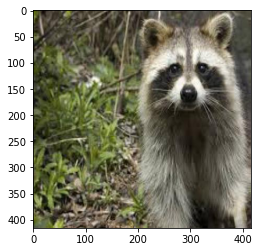

In [8]:
import matplotlib.pyplot as plt

image = plt.imread("r2.jpg")
plt.imshow(image)
plt.show()

# 탐지 실행

In [9]:
bboxes = model.predict(image)

In [10]:
print(len(bboxes))
print(bboxes)

1
[array([1.47715485e+02, 1.99648724e+01, 3.97848633e+02, 3.64609039e+02,
       1.94722950e-01, 0.00000000e+00])]


# 박스 그리기

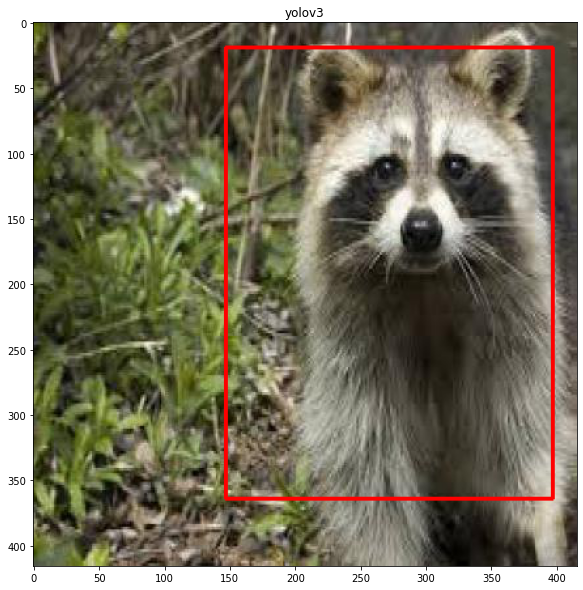

In [13]:
import cv2
import numpy as np

dummy = np.copy(image)

for box in bboxes:
    
    x1, y1, x2, y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])
    conf = box[4]
    cls_id = int(box[5])
        
    dummy = cv2.rectangle(dummy, (x1,y1), (x2,y2), (255,0,0), 2)
     
plt.figure(figsize=(12,10))
plt.gca().set_title("yolov3"), plt.imshow(dummy)
plt.show()